## K-Nearest Neighbours Classifier

K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph. There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.shape

(200, 6)

In [5]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [9]:
print('Bp :',data['BP'].unique())
print('cholesterol :',data['Cholesterol'].unique())
print('Drug :',data['Drug'].unique())

Bp : ['HIGH' 'LOW' 'NORMAL']
cholesterol : ['HIGH' 'NORMAL']
Drug : ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [10]:
X = data.iloc[:,:-1]
Y = data[['Drug']]

In [11]:
X['BP'] = X['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2}).astype(int)
X['Cholesterol'] = X['Cholesterol'].map({'NORMAL':0,'HIGH':1}).astype(int)
X['Sex'] = X['Sex'].map({'F':0,'M':1}).astype(int)

In [12]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [13]:
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [14]:
from sklearn.model_selection import train_test_split
x_traiin,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test = []
for i in range (1,21,2):
    kn_classifier = KNeighborsClassifier(n_neighbors = i)                  # For finding the best K value in KNN
    kn_classifier.fit(x_traiin, y_train)
    y_pred_train = kn_classifier.predict(x_traiin)
    y_pred_test = kn_classifier.predict(x_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))
result = pd.DataFrame({'K-value':range(1,21,2),'Train_accuracy':acc_train,'Test_accuracy':acc_test})
result.set_index('K-value')

,Train_accuracy,Test_accuracy
K-value,,
1,1.000000,0.750000
3,0.821429,0.733333
5,0.764286,0.700000
7,0.757143,0.750000
9,0.750000,0.700000
11,0.742857,0.650000
13,0.728571,0.683333
15,0.707143,0.700000
17,0.735714,0.683333


In [16]:
kn_cls = KNeighborsClassifier(n_neighbors = 7)         # At K > 7, accuracy is decreasing
kn_cls.fit(x_traiin,y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
kn_cls.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [18]:
y_pred_test = kn_cls.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


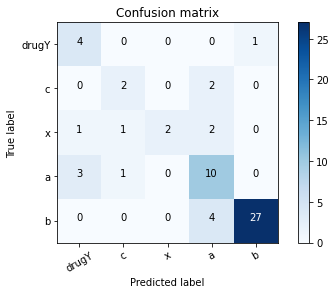

In [21]:
classes = ['drugY','c','x','a','b']
plot_confusion_matrix(cm, classes)